In [1]:
# See env.yaml to configure your environment
import pandas as pd
import numpy as np
import matplotlib.markers
import datetime as dt
import matplotlib as plt

from sentiment_analysis_functions import *
from time_series_analysis_functions import *
from query_functions import *

from statsmodels.tsa.seasonal import seasonal_decompose
from kats.consts import TimeSeriesData

In [2]:
# Assumed to have already queried data from Twitter
df = pd.read_csv('1123_180000_to_1129_235959.csv', low_memory=False)
print(len(df), 'Tweets Pulled')
df.head()

143140 Tweets Pulled


,Unnamed: 0,author_id,created_at,text,conversation_id,in_reply_to_user_id,possibly_sensitive,public_metrics,source,referenced_tweets,...,verified,profile_image_url,name,description,protected,user_metrics,location,username,withheld_tweet,withheld_user
0,0,47237443,2022-11-29T23:59:58.000Z,@USMNT Thank you ♥️,1597740514669101056,7.563792e+06,False,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Twitter for iPhone,"[{'type': 'replied_to', 'id': '159774051466910...",...,False,https://pbs.twimg.com/profile_images/157805608...,seppy,"scientists, mother, freedom lover🙏proud American",False,"{'followers_count': 97, 'following_count': 444...",USA,sepidehp,NaN,NaN
1,1,1549657377762381824,2022-11-29T23:59:57.000Z,@VP @USMNT We are 100% accurate with trades he...,1597730649296850945,8.036942e+17,False,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Twitter for Android,"[{'type': 'replied_to', 'id': '159773064929685...",...,False,https://pbs.twimg.com/profile_images/154965754...,JENNIFER'S,"INVESTORS MENTOR Manages Trade\nAccount💯, Fore...",False,"{'followers_count': 397, 'following_count': 40...",Russia,Jennife39377541,NaN,NaN
2,2,474678686,2022-11-29T23:59:57.000Z,@USSoccerpolitic @VP @USMNT She wasn't talking...,1597730649296850945,1.681379e+08,False,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",Twitter Web App,"[{'type': 'replied_to', 'id': '159773216784475...",...,False,https://pbs.twimg.com/profile_images/137076121...,TiredOfBeingTired🤦🏾‍♀️😤,The road to success is always under construction.,False,"{'followers_count': 1041, 'following_count': 2...",United States,krizzypowell,NaN,NaN
3,3,625700647,2022-11-29T23:59:57.000Z,"@Antonee_Jedi @USMNT Congratulations, and best...",1597731251599073280,3.764217e+08,False,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Twitter Web App,"[{'type': 'replied_to', 'id': '159773125159907...",...,False,https://pbs.twimg.com/profile_images/142728933...,mainieac,NaN,False,"{'followers_count': 23, 'following_count': 156...",Maine,penobscotvalley,NaN,NaN
4,4,1330668367833931776,2022-11-29T23:59:56.000Z,@Rudofaux1 @AbedRahdar8LFC @USMNT Sweet dream ...,1597654990041907200,1.330229e+18,False,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",Twitter for iPhone,"[{'type': 'replied_to', 'id': '159774087129819...",...,False,https://pbs.twimg.com/profile_images/159796510...,Ja,Chiefs • Depressed Buckeyes • Professional Age...,False,"{'followers_count': 935, 'following_count': 31...","St Louis, MO",WokeThuney,NaN,NaN


In [3]:
# Filter for tweets during USAvIRA
USAvIRA_tweets = df.loc[np.where((df.created_at > '2022-11-29T17:58:00.000Z') 
                                        & (df.created_at < '2022-11-29T22:00:00.000Z'))]
USAvIRA_tweets = preprocess(USAvIRA_tweets)
USAvIRA_tweets.head()

,Unnamed: 0,author_id,created_at,text,conversation_id,in_reply_to_user_id,possibly_sensitive,public_metrics,source,referenced_tweets,...,name,description,protected,user_metrics,location,username,withheld_tweet,withheld_user,filtered_text,word_count
8394,8394,1158348890606882816,2022-11-29T21:59:59.000Z,@FOXSoccer @JennyTaft @USMNT Congratulations 💐...,1597704485668782080,1.195931e+08,False,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Twitter Web App,"[{'type': 'replied_to', 'id': '159770448566878...",...,They Call Me Ebrahim,KFUPM| Physics|Thin film growth and characteri...,False,"{'followers_count': 135, 'following_count': 91...",NaN,Deep31471057,NaN,NaN,Congratulations,3
8408,8408,1395148228920741893,2022-11-29T21:59:50.000Z,@LutherBees @Russian_Spyy @MarkAnt43357055 @Th...,1597697673196605440,1.307249e+18,False,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",Twitter Web App,"[{'type': 'replied_to', 'id': '159770277115044...",...,TimeShort 🇺🇸,I block you = you lose\nyou block me = I win\n...,False,"{'followers_count': 9, 'following_count': 0, '...",The Superior United States,TimeShort5,NaN,NaN,crooked tooth Brits crying,5
8417,8417,1473814196102082567,2022-11-29T21:59:59.000Z,@WetSpamFan @LunihanV1 @USMNT American was inv...,1597697673196605440,1.516014e+18,False,"{'retweet_count': 0, 'reply_count': 2, 'like_c...",Twitter for iPhone,"[{'type': 'replied_to', 'id': '159771024651205...",...,DCU Fan,NaN,False,"{'followers_count': 36, 'following_count': 203...","Washington, DC",DCUnitedFAN14,NaN,NaN,American was invented when God decided to let...,17
8422,8422,797211538201440257,2022-11-29T21:59:57.000Z,@FIFAWorldCup @USMNT Top Talents at the FIFA W...,1597710969186275328,1.383723e+08,False,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Twitter for Android,"[{'type': 'replied_to', 'id': '159771096918627...",...,Tobiloba,NaN,False,"{'followers_count': 3459, 'following_count': 3...",👉,hameszizou,NaN,NaN,Top Talents at the FIFA World Cup Qatar 2022,10
8450,8450,1479093780020178950,2022-11-29T21:59:53.000Z,@HowardMortman @lrozen @dougmillsnyt @USMNT Bi...,1597705730244898818,1.326286e+07,False,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Twitter for Android,"[{'type': 'replied_to', 'id': '159770573024489...",...,Cathy Easley,Laugh till U cry! Learn from your mistakes. Be...,False,"{'followers_count': 2271, 'following_count': 2...","La Plata, Argentina",Cathy_Easley01,NaN,NaN,Bitcoin trade has been a lot more easier with...,42


In [4]:
# See tweet distribution
USAvIRA_tweets['word_count'].describe()

count    44853.000000
mean        12.317593
std         10.237526
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         61.000000
Name: word_count, dtype: float64

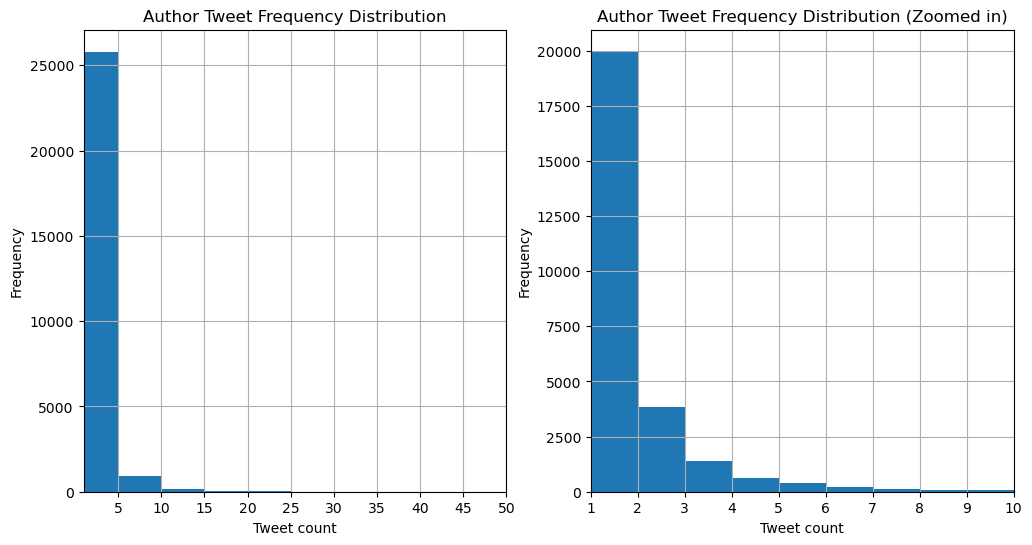

In [5]:
get_author_hist(USAvIRA_tweets, 11)

In [6]:
# Run VADER algorithm to calculate and classify sentiment
USAvIRA_tweets = run_vader(USAvIRA_tweets)
USAvIRA_tweets.head()

,Unnamed: 0,author_id,created_at,text,conversation_id,in_reply_to_user_id,possibly_sensitive,public_metrics,source,referenced_tweets,...,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type,sentiment_compound_polarity_f,sentiment_neutral_f,sentiment_negative_f,sentiment_pos_f,sentiment_type_f
8394,8394,1158348890606882816,2022-11-29T21:59:59.000Z,@FOXSoccer @JennyTaft @USMNT Congratulations 💐...,1597704485668782080,1.195931e+08,False,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Twitter Web App,"[{'type': 'replied_to', 'id': '159770448566878...",...,0.5994,0.562,0.000,0.438,POSITIVE,0.5994,0.000,0.000,1.000,POSITIVE
8408,8408,1395148228920741893,2022-11-29T21:59:50.000Z,@LutherBees @Russian_Spyy @MarkAnt43357055 @Th...,1597697673196605440,1.307249e+18,False,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",Twitter Web App,"[{'type': 'replied_to', 'id': '159770277115044...",...,-0.4767,0.763,0.237,0.000,NEGATIVE,-0.4767,0.492,0.508,0.000,NEGATIVE
8417,8417,1473814196102082567,2022-11-29T21:59:59.000Z,@WetSpamFan @LunihanV1 @USMNT American was inv...,1597697673196605440,1.516014e+18,False,"{'retweet_count': 0, 'reply_count': 2, 'like_c...",Twitter for iPhone,"[{'type': 'replied_to', 'id': '159771024651205...",...,0.2732,0.896,0.000,0.104,POSITIVE,0.2732,0.877,0.000,0.123,POSITIVE
8422,8422,797211538201440257,2022-11-29T21:59:57.000Z,@FIFAWorldCup @USMNT Top Talents at the FIFA W...,1597710969186275328,1.383723e+08,False,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Twitter for Android,"[{'type': 'replied_to', 'id': '159771096918627...",...,0.5859,0.676,0.000,0.324,POSITIVE,0.5859,0.593,0.000,0.407,POSITIVE
8450,8450,1479093780020178950,2022-11-29T21:59:53.000Z,@HowardMortman @lrozen @dougmillsnyt @USMNT Bi...,1597705730244898818,1.326286e+07,False,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Twitter for Android,"[{'type': 'replied_to', 'id': '159770573024489...",...,0.6590,0.886,0.000,0.114,POSITIVE,0.6590,0.870,0.000,0.130,POSITIVE


In [7]:
# Find effects of VADER performance on processed text
mismatches(USAvIRA_tweets)

,raw,filtered,filtered_change
POSITIVE,501,522,21
NEGATIVE,394,485,91
NEUTRAL,250,138,-112


In [8]:
# Find average magnitude of effects from processed text
(USAvIRA_tweets['sentiment_compound_polarity_f'] - USAvIRA_tweets['sentiment_compound_polarity']).abs().mean()

0.023094974695115154

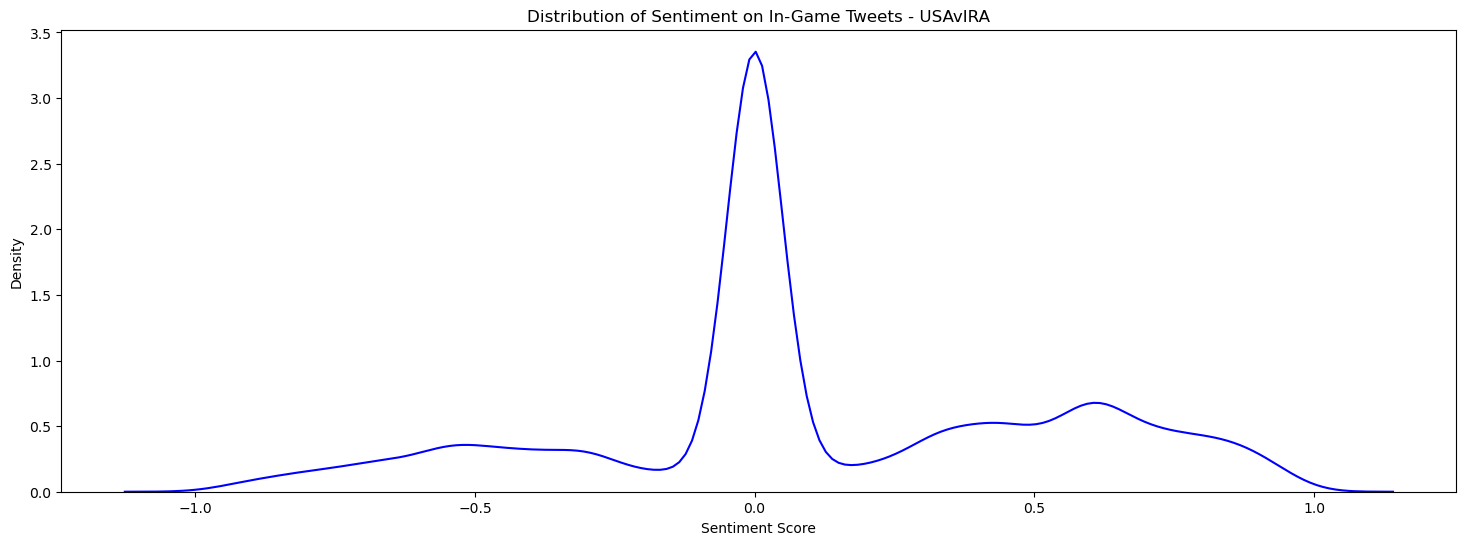

c:\Users\willc\anaconda3\envs\kats_test\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning:

p-value may not be accurate for N > 5000.



ShapiroResult(statistic=0.9399445652961731, pvalue=0.0)

In [9]:
# See distribution of tweet sentiment
get_dist(USAvIRA_tweets['sentiment_compound_polarity_f'], 'USAvIRA')

In [10]:
# See distribution by classification type
USAvIRA_tweets[['sentiment_type_f', 'sentiment_compound_polarity_f']].groupby('sentiment_type_f').describe()

sentiment_compound_polarity_f                              \
                                         count      mean       std     min   
sentiment_type_f                                                             
NEGATIVE                                9497.0 -0.470204  0.220038 -0.9775   
NEUTRAL                                18016.0  0.000000  0.000000  0.0000   
POSITIVE                               17340.0  0.538505  0.226179  0.0015   

                                                  
                     25%     50%     75%     max  
sentiment_type_f                                  
NEGATIVE         -0.6249 -0.4767 -0.2975 -0.0009  
NEUTRAL           0.0000  0.0000  0.0000  0.0000  
POSITIVE          0.3612  0.5707  0.7096  0.9928

In [11]:
# Get extremely positive & extremely negative sentiment tweets for word cloud
extreme_positive = USAvIRA_tweets[USAvIRA_tweets['sentiment_compound_polarity_f']
                            >=np.percentile(USAvIRA_tweets['sentiment_compound_polarity_f'], 95)]
extreme_negative = USAvIRA_tweets[USAvIRA_tweets['sentiment_compound_polarity_f']
                            <=np.percentile(USAvIRA_tweets['sentiment_compound_polarity_f'], 5)]

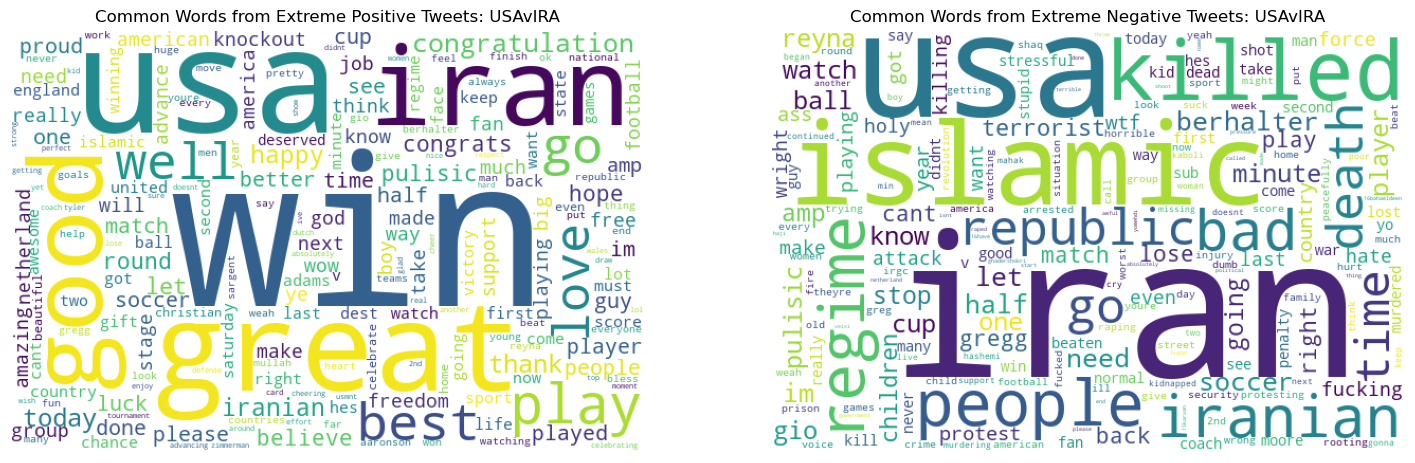

In [12]:
# Render viz of extremely positive & extremely negative sentiment tweets
create_word_cloud(extreme_positive['filtered_text'], extreme_negative['filtered_text'], 'USAvIRA', True, 
                  ['team', 'goal', 'world', 'game', 'fuck', 'shit', 'thats', 
                   'still', 'dont', 'us', 'im' 'ass', 'damn', 'u', 'hell'])

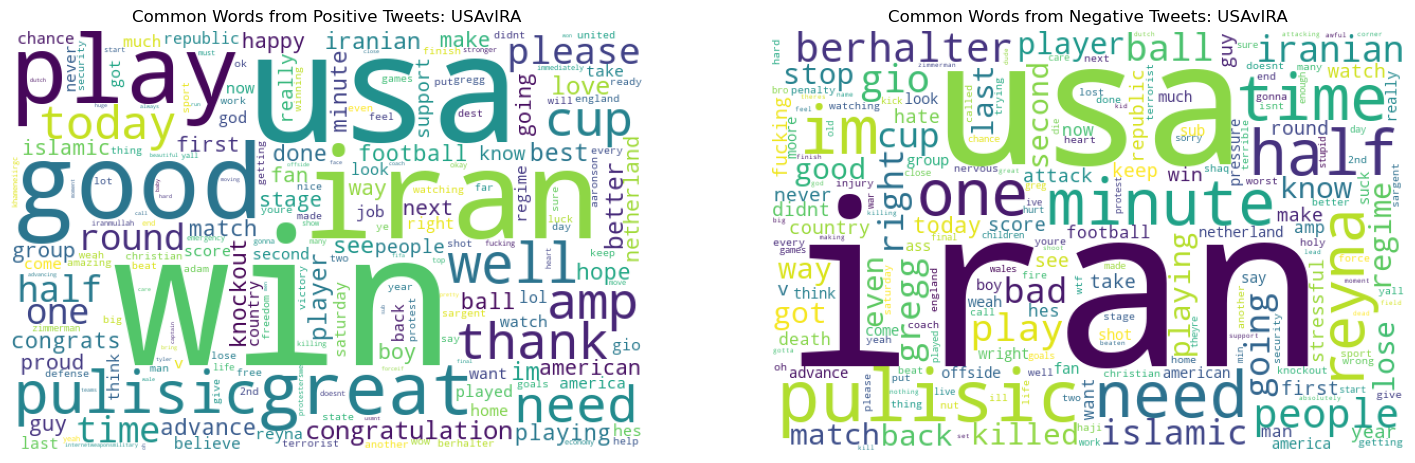

In [13]:
# Render viz for all positive and negative tweets
positive = USAvIRA_tweets[USAvIRA_tweets['sentiment_compound_polarity_f']>0]
negative = USAvIRA_tweets[USAvIRA_tweets['sentiment_compound_polarity_f']<0]

create_word_cloud(positive['filtered_text'], negative['filtered_text'], 'USAvIRA', False, 
                  ['team', 'goal', 'world', 'game', 'soccer', 'fuck', 'shit', 'thats', 
                   'still', 'dont', 'us', 'im' 'ass', 'damn', 'u', 'hell', 
                   'let', 'lets', 'go', 'cant'])

In [14]:
# Split the string of tweet to remove the seconds, convert to a datetime column
USAvIRA_tweets.created_at = pd.to_datetime(USAvIRA_tweets.created_at).dt.strftime('%Y-%m-%d %H:%M')

# Get tweet counts by minute
tweets_m = USAvIRA_tweets.groupby('created_at').count()['id']

# Ensure the created_at field is still a datetime after grouping calculations
tweets_m.index = pd.DatetimeIndex(tweets_m.index)

# See distribution
tweets_m.describe()

count     242.000000
mean      185.342975
std       225.152844
min        46.000000
25%        79.000000
50%       118.000000
75%       187.750000
max      2048.000000
Name: id, dtype: float64

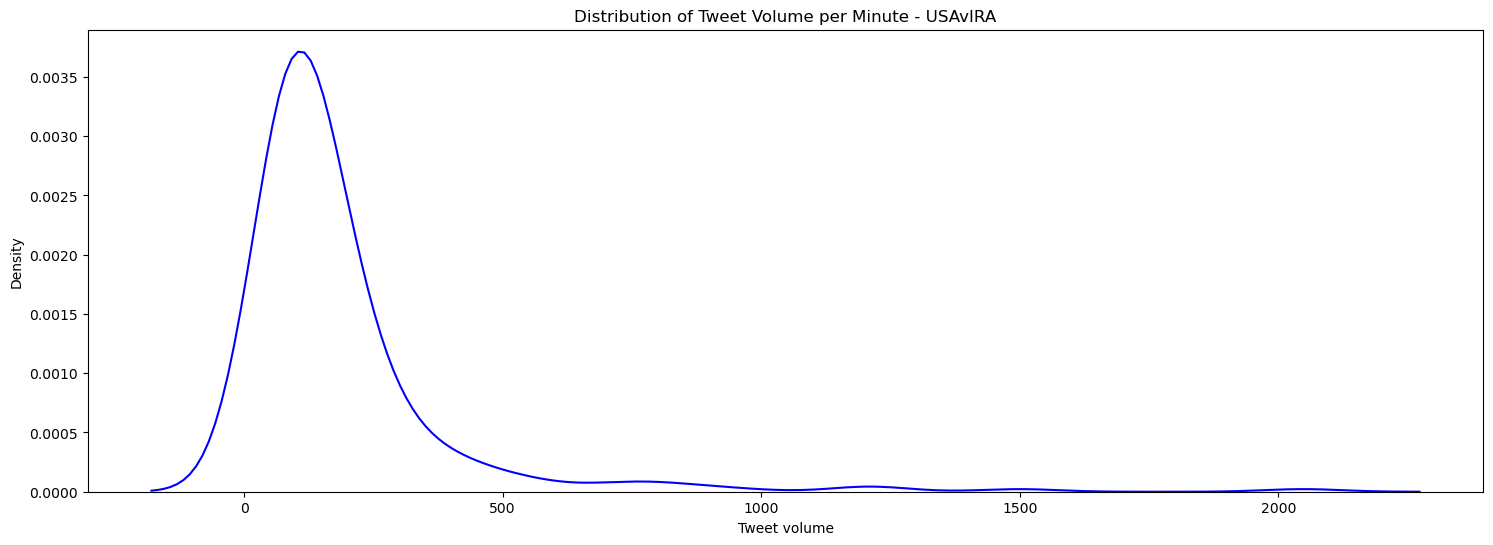

ShapiroResult(statistic=0.5211438536643982, pvalue=3.4055591199363226e-25)

In [15]:
# See distribution of tweets per minute
get_dist_vol(tweets_m, 'USAvIRA')

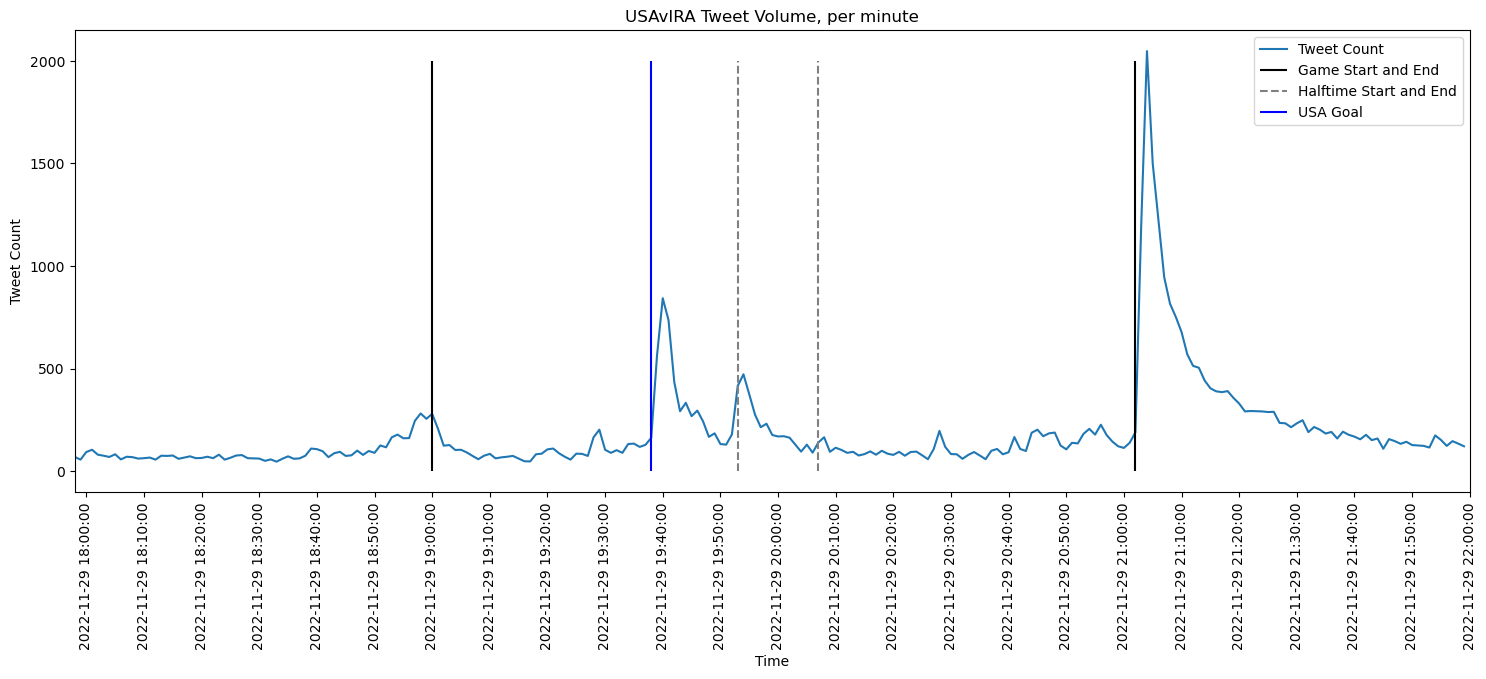

In [16]:
# Generate time series chart of tweet volume
fig, ax = plt.subplots(figsize = (18, 6))

# Set line chart, axes ticks per 10 minutes
tweets_m.plot.line(ax = ax, y='id', title='USAvIRA Tweet Volume, per minute', label='Tweet Count')
ax.set_xticks(pd.date_range(start='2022-11-29 18:00', end ='2022-11-29 22:00', freq='10min'))
ax.set_xticklabels(pd.date_range(start='2022-11-29 18:00', end ='2022-11-29 22:00', freq='10min'), rotation = 90)

# Plot black lines for the game start and end, dashed lines for halftime, and blue lines for American goals
ax.set_xlabel('Time')
ax.set_ylabel('Tweet Count')
ax.vlines(x = ['2022-11-29 19:00:00', '2022-11-29 21:02:00'], ymin = 0, ymax = 2000, color = 'black', label = 'Game Start and End')
ax.vlines(x = ['2022-11-29 19:53:00', '2022-11-29 20:07:00'], ymin = 0, ymax = 2000, color = 'gray', linestyle = 'dashed', label = 'Halftime Start and End')
ax.vlines(x = '2022-11-29 19:38:00', ymin = 0, ymax = 2000, color = 'blue', label = 'USA Goal')
ax.legend();

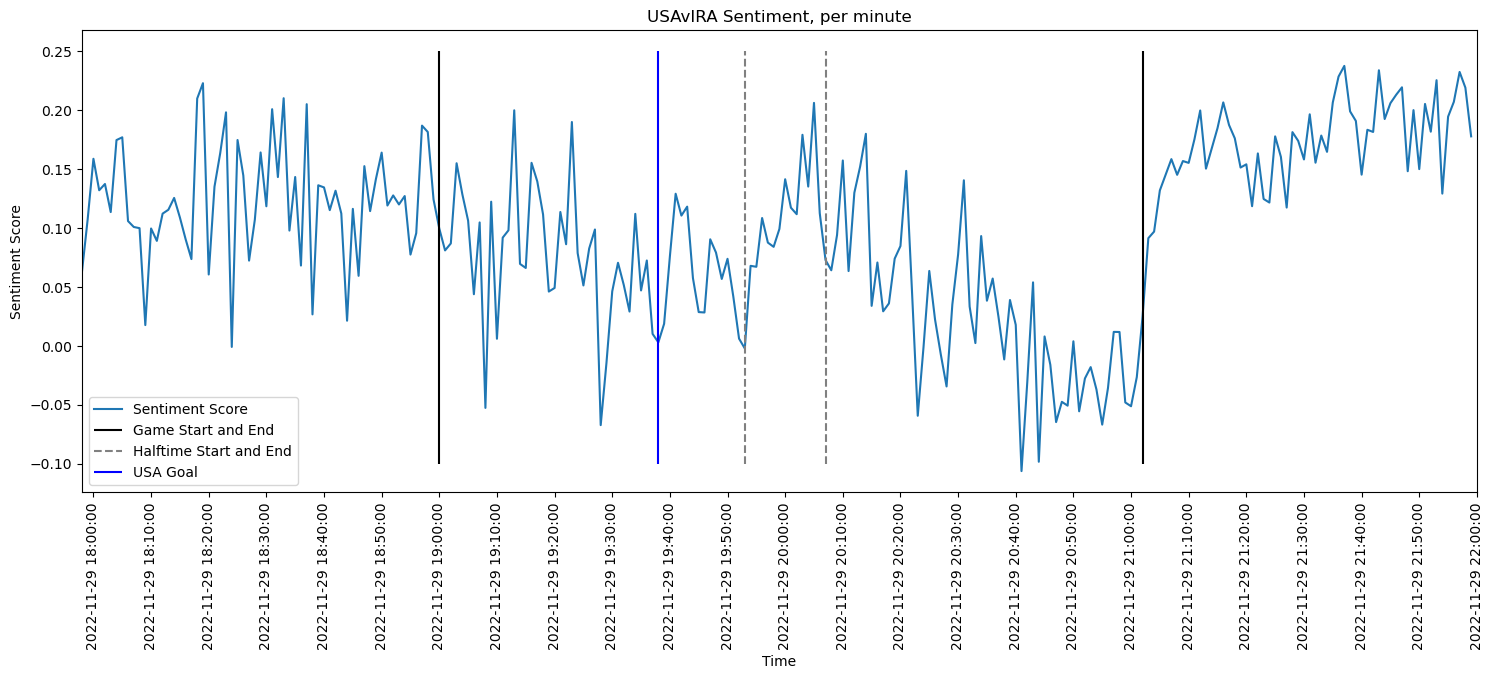

In [17]:
# Replicate time series chart for sentiment
fig, ax = plt.subplots(figsize = (18, 6))

USAvIRA_tweets_m = USAvIRA_tweets.groupby('created_at').agg({'sentiment_compound_polarity_f': 'mean'})
USAvIRA_tweets_m.index = pd.DatetimeIndex(USAvIRA_tweets_m.index)
USAvIRA_tweets_m.plot.line(ax = ax, y='sentiment_compound_polarity_f', 
                            title='USAvIRA Sentiment, per minute', label='Sentiment Score')

# Set axes
ax.set_xlabel('Time')
ax.set_ylabel('Sentiment Score')
ax.set_xticks(pd.date_range(start='2022-11-29 18:00', end ='2022-11-29 22:00', freq='10min'))
ax.set_xticklabels(pd.date_range(start='2022-11-29 18:00', end ='2022-11-29 22:00', freq='10min'), rotation = 90)

# Plot black lines for the game start and end, dashed lines for halftime, and blue lines for American goals
ax.vlines(x = ['2022-11-29 19:00:00', '2022-11-29 21:02:00'], ymin = -0.1, ymax = 0.25, color = 'black', label = 'Game Start and End')
ax.vlines(x = ['2022-11-29 19:53:00', '2022-11-29 20:07:00'], ymin = -0.1, ymax = 0.25, color = 'gray', linestyle = 'dashed', label = 'Halftime Start and End')
ax.vlines(x = '2022-11-29 19:38:00', ymin = -0.1, ymax = 0.25, color = 'blue', label = 'USA Goal')
ax.legend();


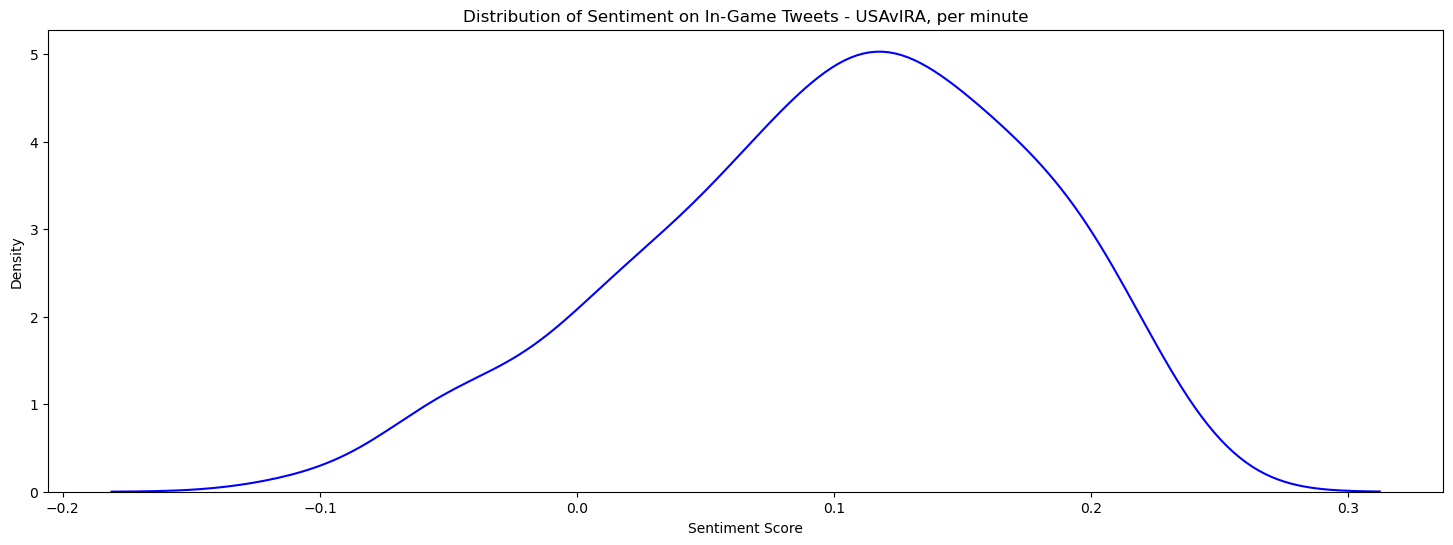

ShapiroResult(statistic=0.9775351285934448, pvalue=0.0006954462151043117)

In [18]:
# See distribution of tweet sentiment by minute
get_dist(USAvIRA_tweets_m['sentiment_compound_polarity_f'], 'USAvIRA, per minute')

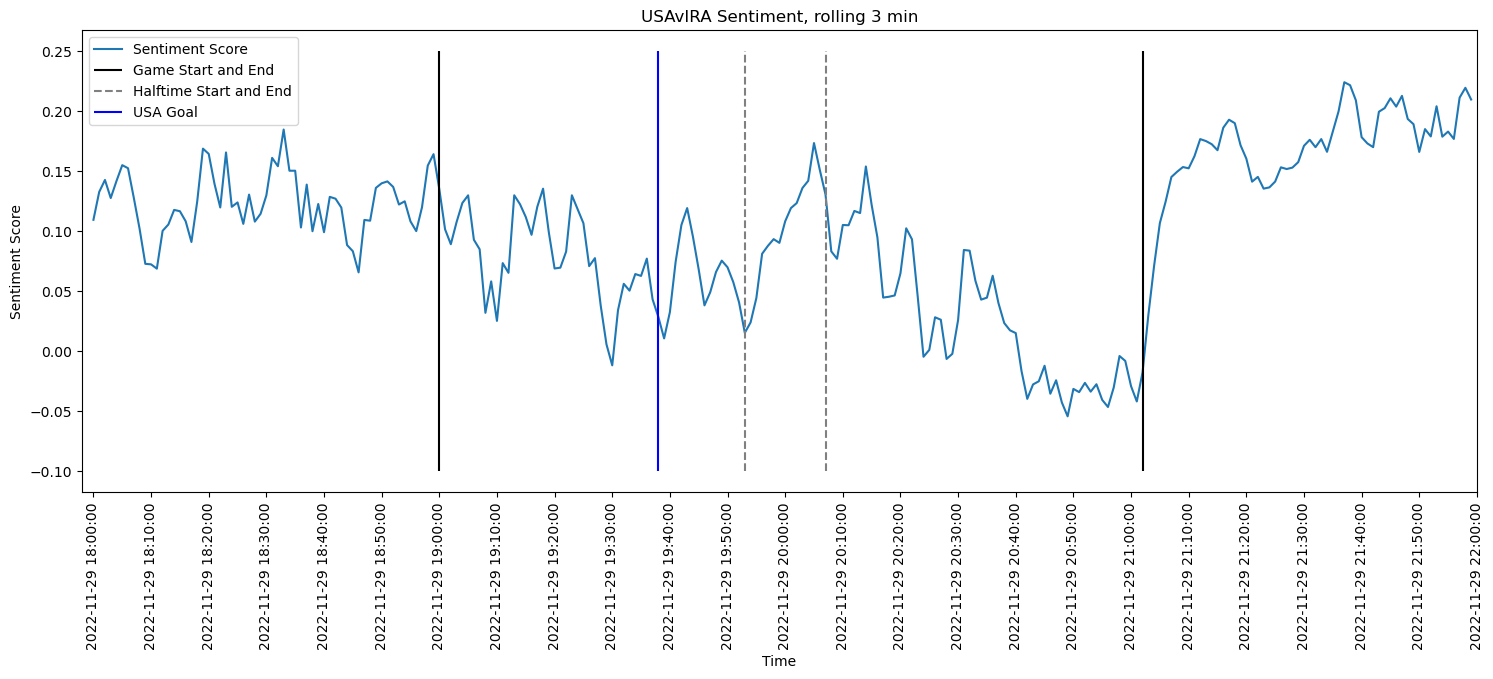

In [19]:
# Replicate visual for 3 minute rolling average
fig, ax = plt.subplots(figsize = (18, 6))

# Calculate the 3 minute rolling average of sentiment score
USAvIRA_tweets_rolling_f = USAvIRA_tweets.groupby('created_at').agg({'sentiment_compound_polarity_f': 'mean'}).rolling(3).mean()

# Ensure the created_at field is still a datetime after grouping calculations
USAvIRA_tweets_rolling_f.index = pd.DatetimeIndex(USAvIRA_tweets_rolling_f.index)

# Plot the line chart with ticks every 10 minutes, set axes
USAvIRA_tweets_rolling_f.plot.line(ax = ax, y='sentiment_compound_polarity_f', 
                                title='USAvIRA Sentiment, rolling 3 min', label='Sentiment Score')
ax.set_xlabel('Time')
ax.set_ylabel('Sentiment Score')
ax.set_xticks(pd.date_range(start='2022-11-29 18:00', end ='2022-11-29 22:00', freq='10min'))
ax.set_xticklabels(pd.date_range(start='2022-11-29 18:00', end ='2022-11-29 22:00', freq='10min'), rotation = 90)

# # Plot black lines for the game start and end, dashed lines for halftime, and blue lines for American goals
ax.vlines(x = ['2022-11-29 19:00:00', '2022-11-29 21:02:00'], ymin = -0.1, ymax = 0.25, color = 'black', label = 'Game Start and End')
ax.vlines(x = ['2022-11-29 19:53:00', '2022-11-29 20:07:00'], ymin = -0.1, ymax = 0.25, color = 'gray', linestyle = 'dashed', label = 'Halftime Start and End')
ax.vlines(x = '2022-11-29 19:38:00', ymin = -0.1, ymax = 0.25, color = 'blue', label = 'USA Goal')
ax.legend();

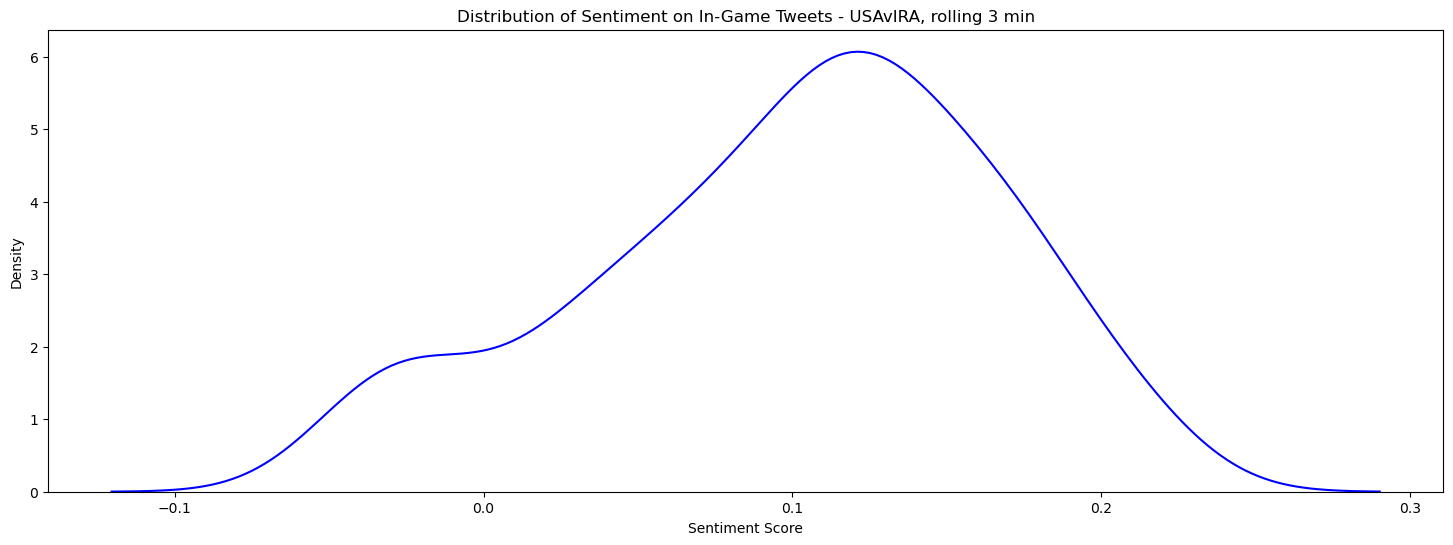

ShapiroResult(statistic=0.970288872718811, pvalue=6.47422784822993e-05)

In [20]:
# See distribution of sentiment for rolling 3 minute average
get_dist(USAvIRA_tweets_rolling_f['sentiment_compound_polarity_f'][2:], 'USAvIRA, rolling 3 min')

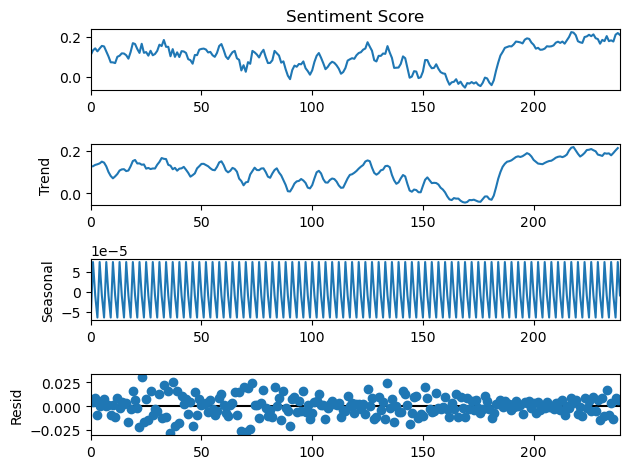

In [21]:
# Analyze time series
# Remove NAs, reset index
ts = USAvIRA_tweets_rolling_f['sentiment_compound_polarity_f'][2:]

ts = ts.reset_index(drop=False)

ts.head()

# Additive Model (multiplicative not appropriate)
additive = seasonal_decompose(ts['sentiment_compound_polarity_f'].rename('Sentiment Score'), 
                            model='additive', period=3)
# Plot
additive.plot();

In [22]:
# Create TimeSeriesData object to feed into kats
USAvIRA_tweets_rolling = USAvIRA_tweets_rolling_f[2:]

data = pd.DataFrame({'time': USAvIRA_tweets_rolling.index, 
                    'raw': USAvIRA_tweets_rolling['sentiment_compound_polarity_f']})
                    
ts = TimeSeriesData(data)
ts

,time,raw
0,2022-11-29 18:00:00,0.109412
1,2022-11-29 18:01:00,0.132622
2,2022-11-29 18:02:00,0.142616
3,2022-11-29 18:03:00,0.127556
4,2022-11-29 18:04:00,0.141748
...,...,...
235,2022-11-29 21:55:00,0.182922
236,2022-11-29 21:56:00,0.176802
237,2022-11-29 21:57:00,0.211204
238,2022-11-29 21:58:00,0.219416


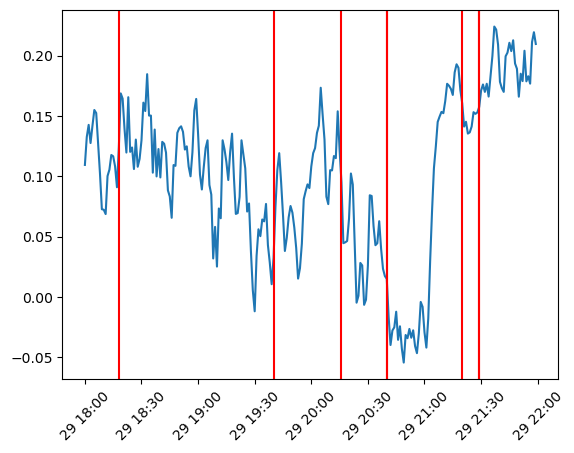

[CUSUMChangePoint(start_time: 2022-11-29 18:18:00, end_time: 2022-11-29 18:18:00, confidence: 0.9986761105609322, direction: increase, index: 9, delta: 0.06879387140352555, regression_detected: True, stable_changepoint: True, mu0: 0.09773116316838401, mu1: 0.16652503457190956, llr: 13.254362660379822, llr_int: 11.837868367435796, p_value: 0.0013238894390678047, p_value_int: 0.002688063632710902),
 CUSUMChangePoint(start_time: 2022-11-29 19:40:00, end_time: 2022-11-29 19:40:00, confidence: 0.996907692159004, direction: increase, index: 7, delta: 0.0523954550398439, regression_detected: True, stable_changepoint: True, mu0: 0.04611713528244231, mu1: 0.09851259032228621, llr: 11.5576751854708, llr_int: 11.324151502889702, p_value: 0.0030923078409960114, p_value_int: 0.0034752955561769827),
 CUSUMChangePoint(start_time: 2022-11-29 20:16:00, end_time: 2022-11-29 20:16:00, confidence: 0.9995061564032547, direction: decrease, index: 7, delta: -0.06088320025442584, regression_detected: True, st

In [23]:
# Run Kats for changepoint detection
change_detect(ts, 6, 6, 1, 0.0035)

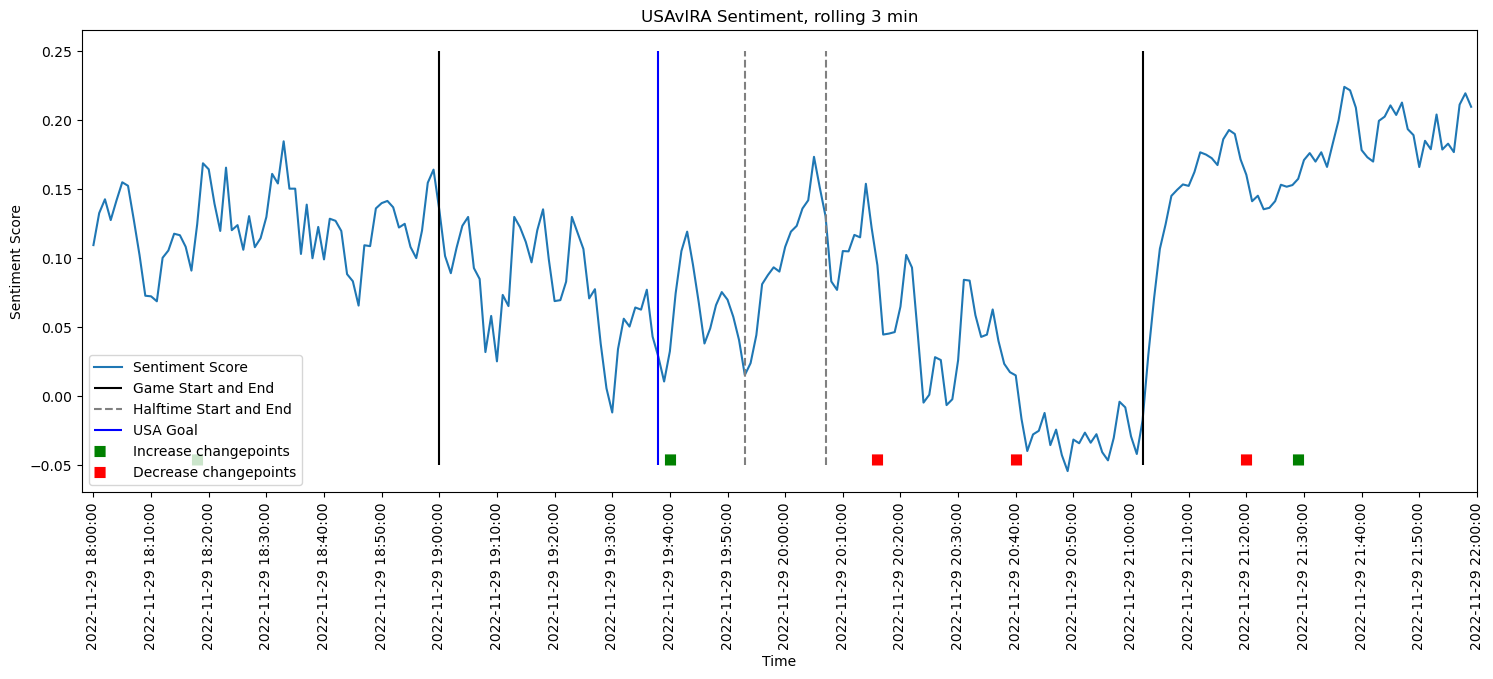

In [24]:
# Add change points to graph
fig, ax = plt.subplots(figsize = (18, 6))

# Ensure the created_at field is still a datetime after grouping calculations
USAvIRA_tweets_rolling_f.index = pd.DatetimeIndex(USAvIRA_tweets_rolling_f.index)

# Plot the line chart with ticks every 10 minutes, set axes
USAvIRA_tweets_rolling_f.plot.line(ax = ax, y='sentiment_compound_polarity_f', 
                                    title='USAvIRA Sentiment, rolling 3 min', label='Sentiment Score')
ax.set_xlabel('Time')
ax.set_ylabel('Sentiment Score')
ax.set_xticks(pd.date_range(start='2022-11-29 18:00', end ='2022-11-29 22:00', freq='10min'))
ax.set_xticklabels(pd.date_range(start='2022-11-29 18:00', end ='2022-11-29 22:00', freq='10min'), rotation = 90)

# # Plot black lines for the game start and end, dashed lines for halftime, and blue lines for American goals
ax.vlines(x = ['2022-11-29 19:00:00', '2022-11-29 21:02:00'], ymin = -0.05, ymax = 0.25, color = 'black', label = 'Game Start and End')
ax.vlines(x = ['2022-11-29 19:53:00', '2022-11-29 20:07:00'], ymin = -0.05, ymax = 0.25, color = 'gray', linestyle = 'dashed', label = 'Halftime Start and End')
ax.vlines(x = '2022-11-29 19:38:00', ymin = -0.05, ymax = 0.25, color = 'blue', label = 'USA Goal')

# Add points to see changepoints
ax.vlines(x = ['2022-11-29 18:18:00', '2022-11-29 19:40:00', '2022-11-29 21:29:00'], 
ymin = -0.05, ymax = -0.04, color = 'green', linestyles = 'dotted', linewidth = 8, label = 'Increase changepoints')
ax.vlines(x = ['2022-11-29 20:16:00', '2022-11-29 20:40:00', '2022-11-29 21:20:00'], 
ymin = -0.05, ymax = -0.04, color = 'red', linestyles = 'dotted', linewidth = 8, label = 'Decrease changepoints')

ax.legend();